<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-con-R/blob/main/ejemplo_de_juguete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Ejemplos de juguete

Autor: Biología de Sistemas UNAM

Fecha: febrero 2021

Mostras ejemplo de depredador presa, dímero/crecimiento logístico/"muerte".

# Ejemplo 1: Crecimiento exponencial 

## 1. Describir el proceso  

Se quiere modelar el crecimiento de un microorganismo en su etapa de crecimiento exponencial. En esta etapa se supone que el crecimiento del microorganismo es proporcional a la cantidad de este que se encuentra presente. Suponemos que la tasa de crecimiento es constante. Bajo estas condiciones la velocidad de crecimiento se puede representar de la siguiente manera:

$$
v_{crec}(t) = k x(t) \tag{1}
$$

Donde $k$ es la tasa de crecimento constante (1/h), y $x$ es la concentración del microorganismo (g/L) al tiempo $t$

En el presente análisis se considera que no hay otra fuente de microorganismos diferente al crecimiento de los mismos. Tampoco se considera una muerte o consumo del microorganismo por parte de otra especie.  

## 2. Red para decribir el proceso 



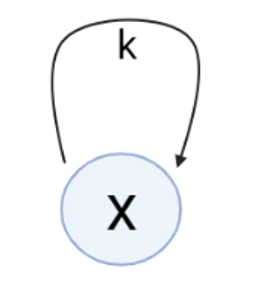

Fig 1. Red del proceso del ejemplo 1. Se aprecia que se considera una sola variable, $x$, en el análisis. Existe un efecto positivo de $x$ sobre sí misma debido al crecimiento de los microorganismo a una tasa constante $k$

## 3. Establecer modelo 

Para el plantamiento del modelo se puede partir de una balance de biomasa de la siguiente manera

$$
\text{cambio de biomasa en el proceso} = \text{entrada de biomasa} - \text{salida de biomasa} + \text{generación de biomasa} - \text{consumo de biomasa}\\
$$


Dado que no hay entrada, salida, o consumo de biomasa se tiene 

$$
\text{cambio de biomasa en el proceso} = \text{generación de biomasa} 
$$


El cambio de biomasa con respecto del tiempo se escribe mediante una ED, y usamos (1) para representar la generación de biomasa

$$
\frac{dx(t)}{dt} = kx(t) = f(x) \tag{2}
$$



Tabla 1. Parámetros del model del ejemplo 1 

| parámetro | valor |
|:---:|:---:|
|   k (1/h) | 0.5    |

El valor del parámetro $k$ en la Tabla 1 ha sido propuesto solo para mostrar el ejemplo 

## 4. Análisis de estabilidad 

Para obtener el punto de equilibrio igualamos (2) a 0 y resolvemos para $x$

$$
\frac{dx(t)}{dt} = kx(t) = 0 \rightarrow x_{ss} = 0
$$

Se obtuvo el punto de equilibrio trivial $x_{ss} = 0$

Para determinar la estabilidad de este punto de equilibrio se pueden emplear varios razonamientos 

1. Calculo de eigenvalor 

Para una ecuación diferencial como (2) el eigenvalor se obtiene como:

$$
\lambda = \frac{df(x)}{dx} = \frac{d(kx)}{dx} = k \tag{3}
$$

De esta manera se tiene que el eigenvalor de (2) es $k$. Si este parámetro es positivo (tasa de crecimiento positiva), el eigenvalor es positivo y el punto de equilibrio es inestable. Si k es negativo, entonces el eigenvalor es negativo y el punto de equilibrio es estable

2. Graficar $dx/dt$ vs $x$

In [1]:
# establecer valor de parámetro
k = 0.5 # 1/h

In [2]:
# cambio de x en t 
dxdt <- function(x) {

    f = k*x

    return(f)
}

In [3]:
# valores de x a evaluar (deben ser biológicamente factibles)
x <- seq(0,10,0.1) # g/L
# evalur dx/dt
f <- dxdt(x) # g/(hL)

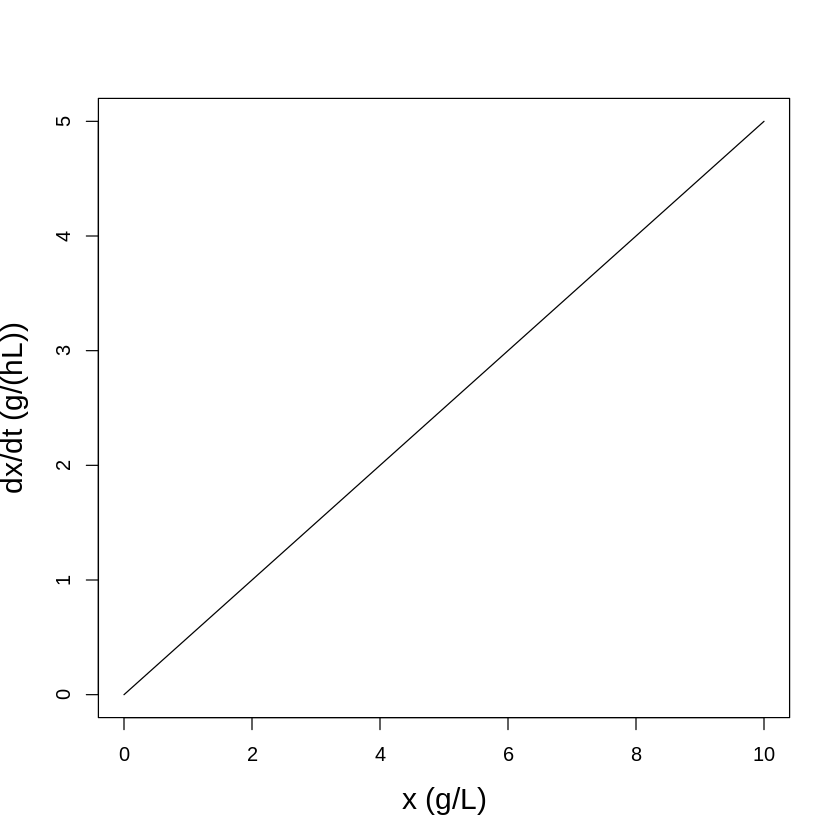

In [4]:
# mostrar gráfica 
plot(x,f, xlab = "x (g/L)", ylab = "dx/dt (g/(hL))", type = "l", cex.lab = 1.5)

Fig 2. Gráfica de $dx/dt$ vs $x$. Se observa que para cualquier valor de $x$ su cambio, $dx/dt$, siempre es positivo. Por esta razón se concluye que para cualquier valor de $x$ distinto de 0, el crecimiento exponencial hará que el sistema se aleje de 0. 

Dado que $k$ es positivo se puede concluir tanto del eigenvalor como de la Fig.2 que el punto de equilibrio $x_{ss}$ es inestable

## 5. Análisis dinámico (integración numérica)

### Breve explicación del método de euler

Se tiene la función 

$$
y(x) =  x^2 \tag{4}
$$

el valor de la función en $x_0 = 1$ es:

$$
y(x_0) = 1^2 = 1
$$

la derivada de (4) es:

$$
\frac{dy}{dt} = \dot{y}(x) =  2x \tag{5}
$$

y su valor en $x_0 = 1$ es: 

$$
\dot{y}(x_0) = 2 \times 1 = 2\
$$

por lo tanto tenemos que la ecuación de la recta tangente a (4) en $x_0$ es: 

$$
y_t(x) = y(x_0)  + m(x - x_0)  = 1 + 2(x - 1) \
$$


$$
y_t(x) = -1 + 2x \tag{6}\
$$

Donde $m$ es la pendiente (derivada) de (4) en $x_0$

Las funciones (4) y (6) se muestran en la Fig. 3

In [5]:
# función (4)
y_x <- function(x) {
    y = x^2
    return(y)
}

# función (5)
dydx <- function(x0) {
    dy <- 2*x0
    return(dy)
}

# función (6)
yt_x <- function(x0, x) {
    y = -1 + dydx(x0)*x
    return(y)
}

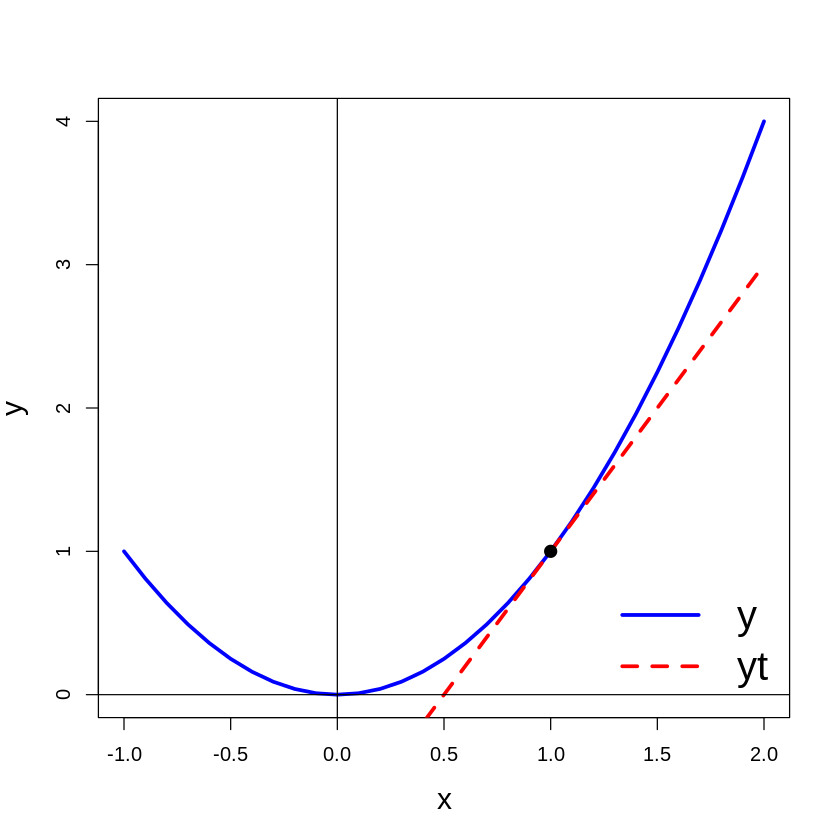

In [6]:
# valores de x a evaluar
x <- seq(-1,2,0.1)

# mostrar funciones
plot(x, y_x(x), type = "l", col = "blue", lwd = 3, xlab = "x", ylab = "y", cex.lab = 1.5)
lines(x, yt_x(1,x), col = "red", lty = 2, lwd = 3)
points(1,1, cex = 2, pch = 20)
abline(h = 0, v = 0)
legend("bottomright", legend = c("y", "yt"), bty = "n", lty = c(1,2), lwd = 3,col = c("blue", "red"), cex = 2)

Figura 3. Grafica de $y$ vs $x$ y $y_t$ vs $x$. Nota como ambas funciones tienen valores similares de $y$ alrededor de $x_0 = 1$. 

En la Fig. 3 se observa que ambas funciones tienen valores similares alrededor de $x_0 = 1$. Por lo tanto, una buena aproximación de (4) cerca de $x_0$ es (6). Es decir 

$$
y \approx y_t = 2x - 1
$$

Si usamos (6) como una aproximación de (4) podemos conocer el valor de un cambio en $y$, en (4), a partir de un cambio en $x$, cerca de $x_0$, de la siguiente manera

$$
\Delta y = m \Delta x, \text{válido para una recta}
$$

o si despejamos $y_2$

$$
y_2 = y_1 + m(x_2 - x_1) \tag{7}
$$

por lo tanto si conocemos los valores $x_0$, $x_1$, y $y_0$, podemos obtener $y_1$ a partir de (7)

La ecuación (7) se puede generalizar para cualquier par de valores consecutivos $x_t$ y $x_{t+1}$ como 

$$
y_{t+1} = y_t + \frac{dy(x_t)}{dt}(x_{t+1} - x_t) 
$$

si se establece el tamaño de paso como

$$
h = x_{t+1} - x_t \tag{8}
$$

se tiene 

$$
y_{t+1} = y_t + \frac{dy(x_t)}{dt}h \tag{9}
$$

Evaluando (9) de forma iterativa se logra obtener una buena aproximación de (4) partiendo de una condicion inicial $x_0$

Nota: Hay que tener presente que (9) es válida para la función de una recta. Cuando la función que evaluamos no es una recta, como (4), hemos visto que si se evalua en un valor inicial $x_0$ y se hacen iteraciones consecutivas usando (9) para un tamaño de paso relativamente pequeño, entonces se obtiene una buena aproximación. Esto se puede apreciar en la Fig. 3 

In [7]:
# cargar librerías para resolver EDOs
install.packages("deSolve")
library(deSolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
# establecer modelo 
crecimiento <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        # balance de biomasa
        dxdt = k*x

        return(list(c(dxdt)))
    })
}

In [9]:
# establecer parámetros 
p <- c(k = 0.5)
# condiciones iniciales
x0 <- c(x = 0.1)
# tiempo de integración
time <- seq(0,10,0.1) # h = 0.1 tamaño de paso

In [10]:
# resolver ED
out <- ode(func = crecimiento, y = x0, times = time, parms = p, method = "euler")

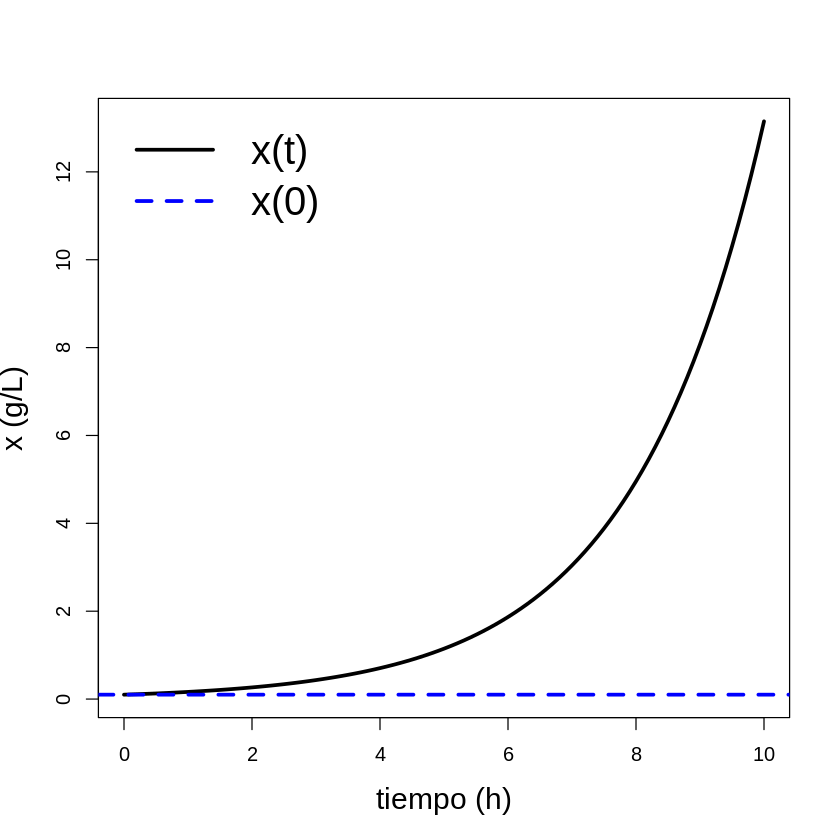

In [11]:
# mostrar resultados 
plot(out[,1], out[,2], xlab = "tiempo (h)", ylab = "x (g/L)", cex.lab = 1.5, type = "l", lwd = 3)
abline(h = x0, lwd = 3, lty = 2, col = "blue")
legend("topleft", legend = c("x(t)", "x(0)"), bty = "n", lty = c(1,2),lwd = 3,, col = c("black", "blue"), cex = 2)

Figur 4. Gráfica de $x(t)$ vs $t$. Se aprecia como la concentración de biomasa, $x(t)$, se aleja de la condición inicial más rápidamente cuando $t \rightarrow \infty$ 

¿Qué ocuriría si el tiempo de simulación fuera de 100 horas? ¿Cuántos microorganismo habría después de 4 días? El modelo (2) tiene limitaciones en cuanto al rango de valores de concentración en el cual describe de forma adecuada el proceso. Si consideramos una población muy grande de microorganismos, es natural pensar que los recursos empezarían a escasear, o se podrían generar productos de su metabolismo que resulten tóxicos. Veamos un ejemplo que considere estos efectos negativos sobre el crecimiento 

# Ejemplo 2: Crecimiento logístico 

## 1. Descripción del proceso 

Consideremos una población de peces que viven alimentandose material orgánico presente en su ambiente. Podemos asumir que este material del que se alimentan permanece aproximadamente constante. Además consideremos que la tasa de muerte del los peces, $d$, es constante. Por otro lado, se tiene que la tasa de nacimiento depende de la cantidad de peces, y obedece la siguiente relación:

$$
v(P) = b(1 - \frac{P}{k_1}) \tag{10}
$$

donde $b$ represente la tasa de nacimiento máxima (1/dias), que se obtiene cuando $P \rightarrow 0$. El parámetro $k_1$ representa la cantidad de peces para la cual la tasa de nacimiento es cero.

In [12]:
birth_rate <- function(P) {
    rate = b*(1 - P/k1)
    return(rate)
} 

In [13]:
# establecer valor de parámetros 
b = 0.5 # 1/dias
k1 = 100 # peces
d = 0.1 # 1/dias

In [14]:
# valores de P a evaluar 
P <- seq(0,120,1)
br <- birth_rate(P)

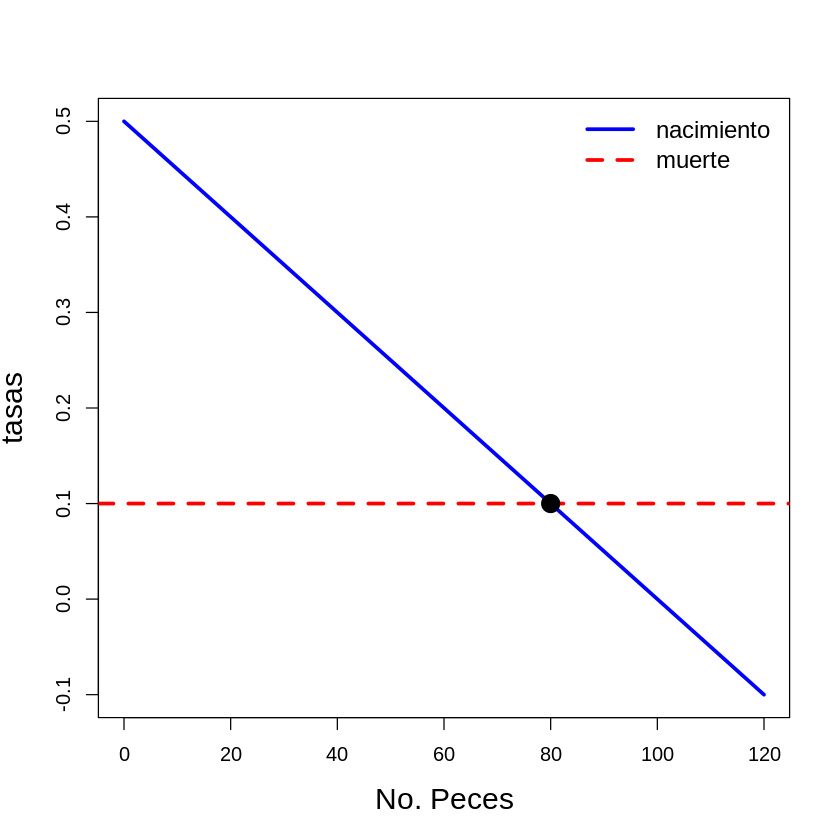

In [15]:
plot(P, br, type = "l", xlab = "No. Peces", ylab = "tasas", lwd = 3, lty = 1, col = "blue", cex.lab = 1.5)
abline(h = d,, lwd = 3, lty = 2, col = "red")
legend("topright", legend = c("nacimiento","muerte"), bty = "n", lwd = 3, lty = c(1,2), cex = 1.2, col = c("blue","red"))
points(80,0.1, pch = 20, cex = 3)

Figura 5. Tasa de nacimiento de de muerte vs No. Peces. Mientras que la tasa de muerte (línea roja punteada) permanece constante, la tasa de nacimiento (línea azul continua) disminuye al aumentar el número de peces. Esta disminución se puede atribuir a una competencia por los recursos, o por agotamiento de los mismos. 

En el presente análisis no consideramos ninguna fuente de peces diferente a su nacimiento, ni tampoco algún consumo de los peces por parte de un depredador. 

## 2. Red para describir el proceso 

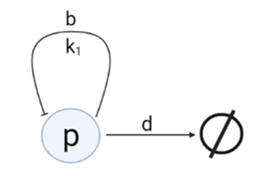

Figura 6. Red del proceso del ejemplo 2. Se observa que en el análisis consideramos solamente una variable, $P$. Existe un efecto positivo de esta variable sobre sí misma debido a los nacimientos. Sin embargo, también está presente un efecto de retroalimentación negativa debido a que cuando hay un gran número de peces, comienza a presentarse un efecto negativo de los peces sobre su crecimiento. Además, se observa la muerte de los peces a una tasa constante

## 3. Establecer modelo

Para plantear el modelo podemos empezar con una balance en el número de peces

$$
\text{cambio en el número de peces} = \text{peces que entran} - \text{peces que salen} + \text{peces que se generan} - \text{peces que mueren}\\
$$

Dado que en el ejemplo solo consideramos el nacimiento y la muerte de los peces se tiene 

$$
\text{cambio en el número de peces} = \text{peces que se generan} - \text{peces que mueren}\\
$$

Lo cual se representa mediante el siguiente modelo 

$$
\frac{dP}{dt} = b\left(1 - \frac{P}{k_1} \right)P - dP \tag{11}
$$

Tanto la tasa de nacimiento máxima, $b$, como la tasa de muerte, $d$, tiene unidades de (1/dias). 

Si desarrollamos (10) y reordenamos se tiene

$$
\frac{dP}{dt} = bP - \frac{bP^2}{k_1} - dP
$$

$$
\frac{dP}{dt} = P\left(b - d - \frac{bP}{k_1}\right)
$$

Haciendo 

$$
r = b-d\hspace{1cm} \text{tasa neta de crecimiento, (1/días)}
$$

$$
K = \frac{(b-d)k_1}{b} \hspace{1cm} \text{capacidad de carga, (peces)}
$$

se llega a

$$
\frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) \tag{12}
$$

La ecuación (12) se conoce como el modelo logístico. Describe el crecimiento de una población donde existe una retroalimentación negativa de la población sobre su crecimiento debido al agotamiento de recursos o a la competencia entre los individuos en la población. En la Fig. 7 se observa una gráfica de esta función.

In [16]:
logistic <- function(P) {
    dPdt = r*P*(1-P/K)
    return(dPdt)
}

In [17]:
# valor de parámetros 
r = 0.5 # (1/day)
K = 100 # (fish)
# valores de p a evaluar 
P = seq(0,110,1)

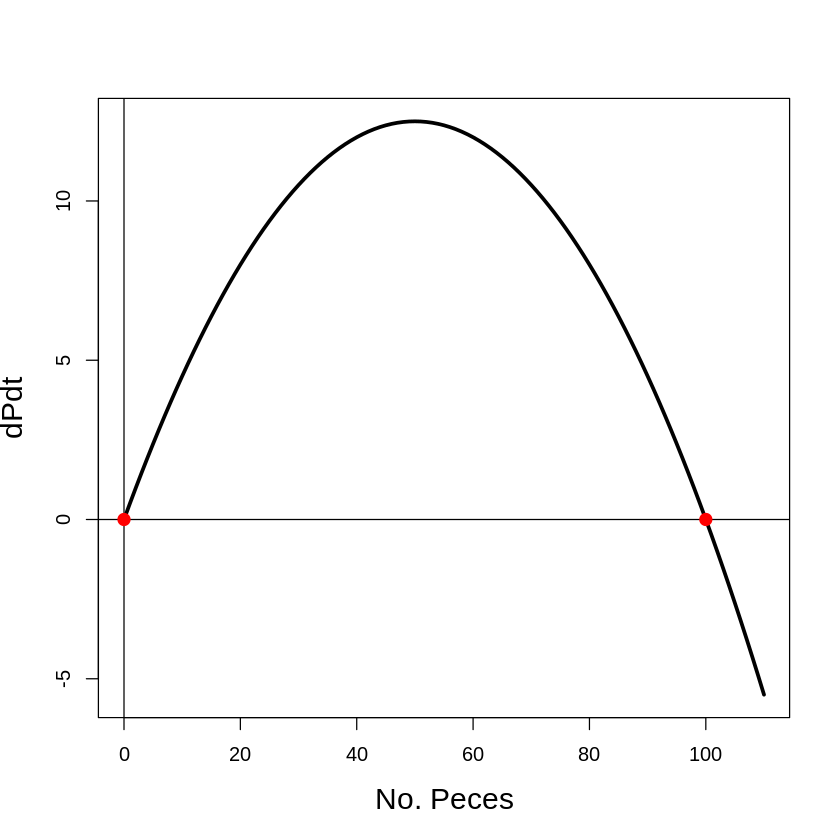

In [18]:
# mostrar cambio en el número de peces 
plot(P, logistic(P), type = "l", lwd = 3, cex.lab = 1.5, xlab = "No. Peces", ylab = "dPdt")
abline(h = 0, v = 0)
points(c(0,K),rep(0,2), pch = 20, cex = 2, col = "red")

Figura 7. Gráfica de $dP/dt$ vs $P$. Se observa como existen dos puntos de equilibrio (puntos rojos). También es importante señalar el hecho de que la gráfica muestra un máximo entre los puntos de equilibrio. Además se observa que para valores de $P$ en el rango $(0, K)$ el cambio en el número de peces es positivo, mientras que para valores en el rango $(K, \infty)$, el cambio en el número de peces es negativo

Tabla 1. Parámetros del modelo del ejemplo 2

| parámetro | valor |
|:---:|:---:|
|r (1/días) | 0.5 |
| K (peces) | 100 |

El valor de los parámetros mostrado en la Tabla 2 han sido escogidos solo para mostrar el ejemplo

## 4. Análisis de estabilidad 

Para determinar los puntos de equlibrio igualamos (12) a cero

$$
\frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) = 0 \rightarrow P_{ss1} = 0, \hspace{0.5cm} P_{ss2} = K
$$

De esta manera se obtiene dos puntos de equilibrio, $P_{ss1} = 0$ y $P_{ss2} = K$. Estos punto de equilibrio se pueden observar en la Fig. 7

La estabilidad de los puntos de equilibrio se puede obserner de dos formas. 

1. Graficar $dP/dt$ vs $P$
Primero, al observar la Fig. 7 se observa que para valores de $P$ en el rango $(0,K)$ el cambio en el número de peces $dP/dt$ siempre es positivo, por lo tanto la población de peces aumenta. Debido a esto podemos establecer que si la población de peces tiene un valor en este rango, la población va a aumentar hasta llegar a un valor $K$. Si por otro lado, la población de peces está en el rango $(K, \infty)$, se tiene que el cambio en el número de peces, $dP/dt$, es negativo, por lo tanto la población de peces disminuye hasta llegar al valor $K$. De esta manera concluimos que el punto de equilibrio $P_{ss1} = 0$ es inestable ya que para valores de $P$ en el rango $(0,K)$ siempre nos alejamos de este punto de equilibrio. Mientras que el punto de equilibrio $P_{ss2} = K$ es estable debido a que para valores de $P$, diferentes de $0$, siempre nos acercamos a este valor.

2. Calculo de eigenvalor 

Para el modelo (12) se tiene que la derivada con respecto de $P$ es 

$$
\frac{df}{dP} = r - \frac{2rP}{K} \tag{13}
$$

Evaluando (13) en $P_{ss1} = 0$ se tiene

$$
\lambda = \frac{df}{dP} \bigg|_{P=0} = r > 0
$$

Por lo tanto, el punto de equilibrio $P_{ss1} = 0$ es inestable

Evaluando (13) en $P_{ss2} = K$ se tiene 

$$
\lambda = \frac{df}{dP}\bigg|_{P = K} = r - \frac{2rK}{K} = -r < 0
$$

De esta manera se tiene que el punto de equilibrio $P_{ss2} = K$ es estable.



## 5. Análisis dinámico 

Ahora realizamos la integración numérica de (12) 

In [19]:
log_growth <- function(time, parms, state) {
    with(as.list(c(parms, state)), {
        dPdt = r*P*(1 - P/K)
        return(list(c(dPdt)))
    })
}

In [20]:
# establecer valor de parámetros 
p <- c(r = r, K = K)
# condiciones iniciales 
P0 <- c(P = 2)
# tiempo de integración 
time <- seq(0,20,0.1) # días

In [21]:
# resolver ODE
out <- ode(func = log_growth, y = P0, times = time, parms = p, method = "rk4")

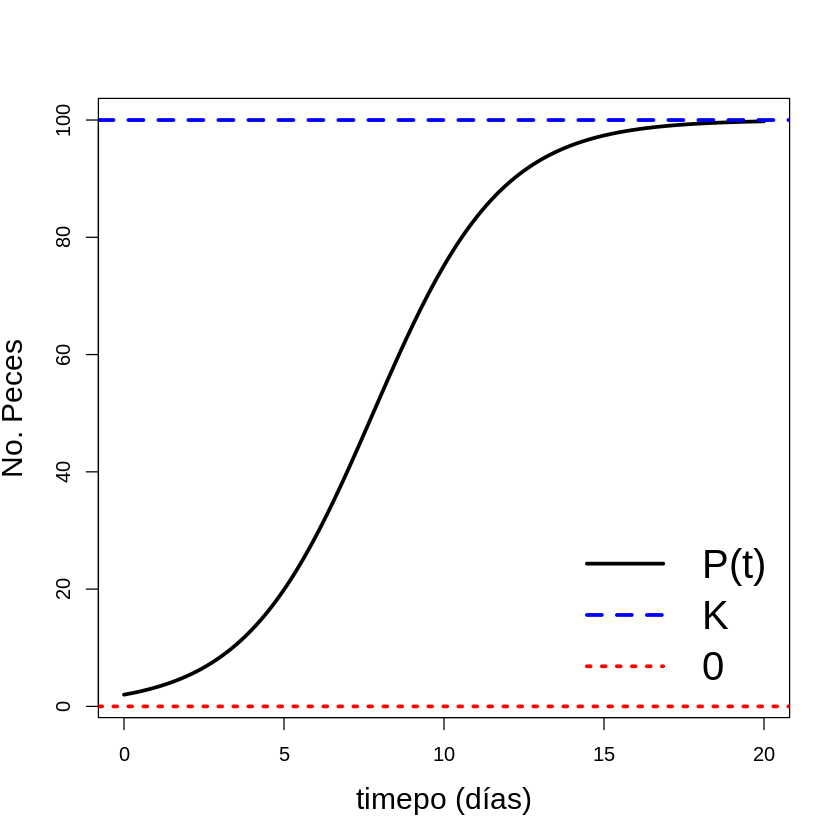

In [22]:
# mostrar resultados de simulación 
plot(out[,1], out[,2], type = "l", lwd = 3, cex.lab = 1.5, xlab = "timepo (días)", ylab = "No. Peces")
abline(h = K, lwd = 3, lty = 2, col = "blue")
abline(h = 0, lwd = 3, lty = 3, col = "red")
legend("bottomright", legend = c("P(t)", "K", "0"), bty = "n", lty = c(1,2,3),lwd = 3,, col = c("black", "blue", "red"), cex = 2)

Figura 8. Comportamiento dinámico de (12). Observa como al avanzar el tiempo la población de peces se aleja de $0$ y tiene hacia $K$

# Ejemplo 3: Modelo de Lotka Volterra

## 1. Describir proceso 

Se tiene una población de venados que es consumida por una población de lobos. La población de venados nace a una tasa constante, $\alpha$. Se supone que la única forma en la que los venados mueren es mediante el consumo de los lobos (su tasa de muerte es despreciable comparada con la tasa de consumo), la tasa de consumo de venados por parte de los lobos es $\beta$. Consideramos además que los lobos nacen a una velocidad proporcional a la velocidad de consumo. Los lobos mueren a una tasa constante $\delta$. 

## 2. Red para decribir el proceso

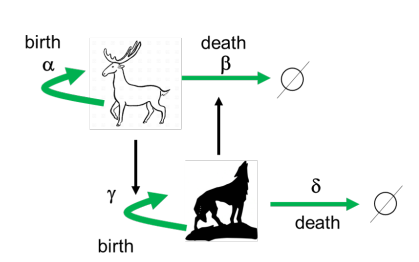

Figura 9. Red para describir el proceso del ejemplo 3. Se observa que se consideran dos variables de estado, los venados $V$ y los lobos $L$. Se aprecia el efecto positivo de los venados sobre su crecimiento y el crecimiento de los lobos. También se puede ver el efecto negativo de los lobos sobre los venados. 

## 3. Establecer el modelo 

Balance para el número de venados 

$$
\text{cambio en el número de venados} = \text{nacimiento de venados} - \text{consumo de venados}
$$

$$
\frac{dV}{dt} = \alpha V  - \beta LV \tag{14}
$$

Balance en el número de lobos 

$$
\text{cambio en el número de lobos} = \text{nacimiento de lobos} - \text{muerte de lobos}
$$

$$
\frac{dL}{dt} = a \beta LV - \delta L
$$

Si hacemos $\gamma = a \beta$ se obtiene

$$
\frac{dL}{dt} = \gamma LV - \delta L \tag{15}
$$

De esta manera se tiene que (14) y (15) describen el crecimiento de los venados y los lobos

Tabla 3. Parámetros del modelo en el ejemplo 3

| parámetro | valor | interpretación |
|:---:|:---:|:---:|
| $\alpha$ (1/días) | 0.5 | tasa de nacimiento de venados|
| $\beta$ (1/(días*lobos)) | 0.1 | tasa de consumo de venados |
| $\gamma$ (1/(días*venados)) | 0.05 | tasa de nacimiento de lobos | 
| $\delta$ (1/días) | 0.1 | tasa de muerte de lobos |

El valor de los parámetros en la Tabla 3 se escogieron solo para mostrar el ejemplo

## 4. Análisis de estabilidad 

Para obtener los puntos de equilibrio del sistema igualamos (14) y (15) a 0

$$
\frac{dV}{dt} = \alpha V - \beta LV = 0 \tag{16}
$$

$$
\frac{dL}{dt} = \gamma LV - \delta L = 0 \tag{17}
$$

A partir de (16) se obtien las soluciones 

$$
V_{ss} = 0, \hspace{0.5cm} L_{ss} = \frac{\alpha}{\beta}
$$

mientras que de (17) se obtiene 

$$
V_{ss} = \frac{\delta}{\gamma}, \hspace{0.5cm} L_{ss} = 0
$$

Dado que se requiere que tanto (16) como (17) se satisfagan se tiene los siguientes pares de valores $V$, $L$ como puntos de equilibrio 

$$
\text{punto de equilibrio 1}: \hspace{1cm} V_{ss1} = 0,\hspace{0.5cm} L_{ss1} = 0
$$

$$
\text{punto de equilibrio 2}: \hspace{1cm} V_{ss2} = \frac{\delta}{\gamma},\hspace{0.5cm} L_{ss2} = \frac{\alpha}{\beta}
$$

El primer punto de equilibrio es el equilibrio trivial, mientras que el segundo representa un escenario en el que se tiene tanto venados como lobos en el equilibrio. A continuación analizamos su estabilidad. 

1. Gráficar el plano de fase 

Un plano de fase es una de las herramientas más ́utiles para estudiar los puntos deequilibrio, así como su estabilidad, de un sistema de ecuaciones diferenciales con dos variablesde estado. El plano de fase es una gráfica en el sistema de coordenadas rectangulares en la que el eje horizontal y el eje vertical contienen valores de las variables de estado. En el plano de fase se dibujan trayectorias correspondientes a diferentes condiciones iniciales. Por trayectoria se entiende un conjunto de valores de las variables de estado que forman la solución del sistema deecuaciones diferenciales para una determinada condición inicial. Además, es común dibujar las ceroclinas en el plano de fase, las cuales dividen el plano en diferentes regiones. Se entiende por ceroclina al conjunto de valores de las variables de estado para las cuales la velocidad de cambio de una de las variables es cero

In [23]:
# establecer valor de parámetros 
alpha <- 0.5 # 1/día
beta <- 0.1 # 1/(día*lobo)
gamma <- 0.05 # 1/(día*venado)
delta <- 0.1 # 1/día

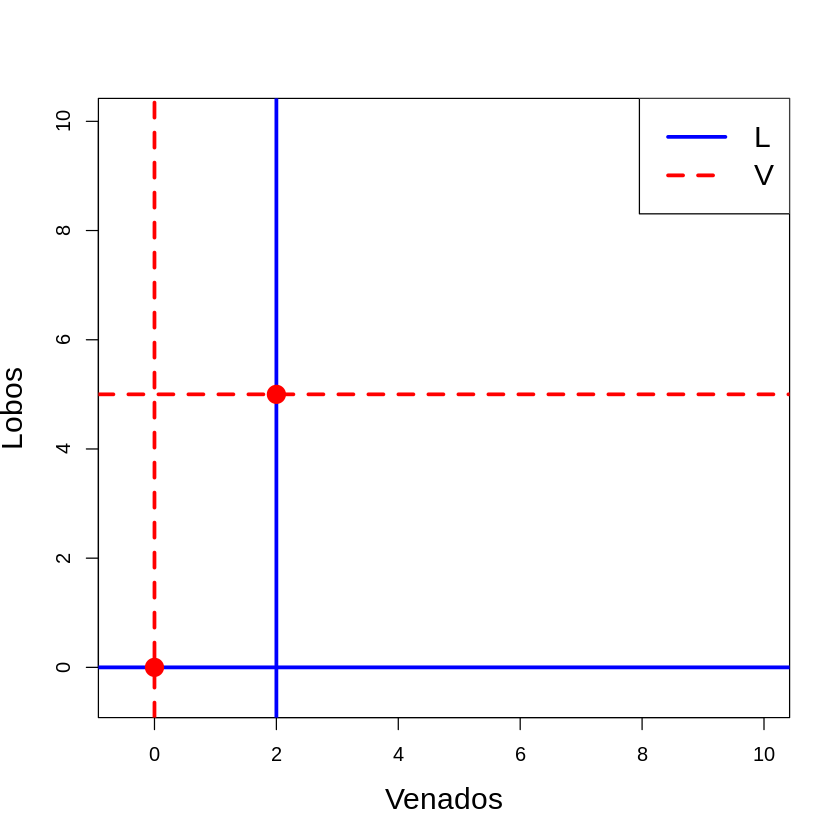

In [24]:
# dibujar plano
plot(0,0, type = "n", ylim = c(-0.5,10), xlim = c(-0.5,10), xlab = "Venados", ylab = "Lobos", cex.lab = 1.5)

# dibujar ceroclinas
abline(h = 0, v = 0, col = c("blue","red"), lwd = 3, lty = c(1,2))
abline(h = alpha/beta, v = delta/gamma, col = c("red","blue"), lwd = 3, lty = c(2,1))

# dibujar puntos de equilibrio
points(c(0, delta/gamma), c(0, alpha/beta), pch = 20, col = "red", cex = 3)
legend("topright", legend = c("L","V"), lwd = 3, lty = c(1,2), col = c("blue","red"), cex = 1.5)

Para determinar la estabilidad de los puntos de equilibrio podemos estudiar el campo de velocidades alrededor de estos puntos 

In [25]:
# cargar paquete shape (para las flechas)
install.packages("shape")
library(shape)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



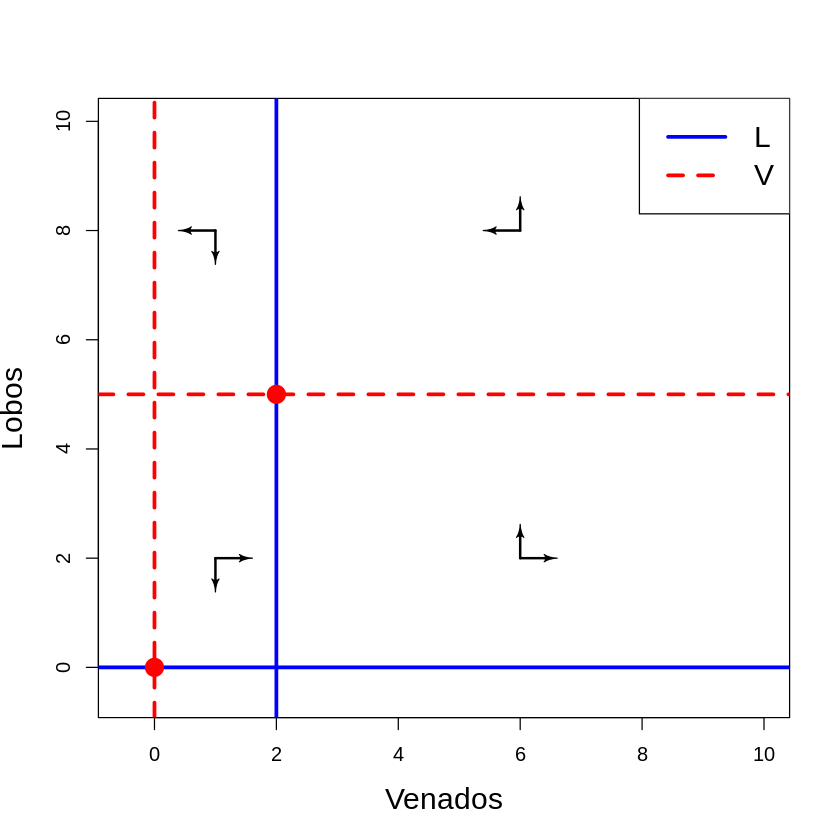

In [26]:
# dibujar plano
plot(0,0, type = "n", ylim = c(-0.5,10), xlim = c(-0.5,10), xlab = "Venados", ylab = "Lobos", cex.lab = 1.5)

# dibujar ceroclinas
abline(h = 0, v = 0, col = c("blue","red"), lwd = 3, lty = c(1,2))
abline(h = alpha/beta, v = delta/gamma, col = c("red","blue"), lwd = 3, lty = c(2,1))

# dibujar puntos de equilibrio
points(c(0, delta/gamma), c(0, alpha/beta), pch = 20, col = "red", cex = 3)
legend("topright", legend = c("L","V"), lwd = 3, lty = c(1,2), col = c("blue","red"), cex = 1.5)

# dibujar flechas del campo de velocidades
x0 <- c(1,6,6,1,1,6,6,1)
y0 <- c(2,2,8,8,2,2,8,8)
x1 <- c(1.5,6.5,5.5,0.5,1,6,6,1) 
y1 <- c(2,2,8,8,1.5,2.5,8.5,7.5) 
Arrows(x0, y0, x1, y1, arr.length = 0.2, code = 2, arr.lwd = 1, segment = 50, lwd = 2, 
       arr.type = "curved", arr.col = 1, lcol = 1)

En este caso no es posible determinar la estabilidad de los puntos de equilibrio a partir del campo de velocidades. Sin embargo, ver el plano de fase nos ayuda a tener una idea de su estabilidad. EL punto de equilibrio no trivial parece ser un centro. 

2. Cálculo de eigenvalores 

Para determinar los eigenvalores de un sistema con dos variables debemos seguir una serie de pasos que se muestran a continuación

1. Obtener las derivadas parciales de las EDOs

Recordando que las EDOs que describen el proceso son 


$$
\frac{dV}{dt} = f(V,L) = \alpha V  - \beta LV 
$$

$$
\frac{dL}{dt} = g(V,L) = \gamma LV - \delta L 
$$

Las derivadas parciales son 
$$
\frac{\partial f}{\partial V} = \alpha - \beta L\
$$

$$
\frac{\partial f}{\partial L} = -\beta V\
$$

$$
\frac{\partial g}{\partial V} = \gamma L \
$$

$$
\frac{\partial g}{\partial L} = \gamma V - \delta
$$

2. Formar la matriz Jacobiana 

Ahora formamos la matriz Jacobiana empleando las derivadas parciales 

$$
J(V,L) = 
\begin{bmatrix}
\frac{\partial f}{\partial V} & \frac{\partial f}{\partial L}\\
\frac{\partial g}{\partial V} & \frac{\partial g}{\partial L} 
\end{bmatrix} =
\begin{bmatrix}
\alpha - \beta L & -\beta V\\
\gamma L & \gamma V - \delta
\end{bmatrix} \tag{18}
$$




3. Evaluar la matriz Jacobiana en los puntos de equilibrio y calcular los eigenvalores 

Punto de equilibrio trivial $(0,0)$

$$
J(0,0) = 
\begin{bmatrix}
\alpha - \beta \times 0 & -\beta \times 0\\
\gamma \times 0 & \gamma \times 0 - \delta
\end{bmatrix}  = 
\begin{bmatrix}
\alpha  & 0\\
 0 &  - \delta
\end{bmatrix}  \tag{19}
$$

Los eigenvalores se calcular como sigue 

$$
\lambda = \frac{tr \pm \sqrt{tr^2 - 4det}}{2}
$$

Donde $tr$ es la traza de la matriz y det es su determinante. Por lo tanto tenemos 

$$
\lambda = \frac{\alpha - \delta \pm \sqrt{(\alpha- \delta)^2 - 4 \times 0}}{2}
$$

$$
\lambda = \frac{\alpha - \delta \pm (\alpha- \delta)}{2}
$$

$$
\lambda_1 = \alpha, \hspace{1cm} \lambda_2 = - \delta
$$


Dado que los eigenvalores tienen signo opuesto, concluimos que el punto de equilibrio $(0,0)$ es inestable y es un punto silla.

Nota que los eigenvalores son iguales a los elementos en la diagonal de (19)


Punto de equilibrio no trivial $(\frac{\delta}{\gamma}, \frac{\alpha}{\beta})$

$$
J(\frac{\delta}{\gamma},\frac{\alpha}{\beta}) = 
\begin{bmatrix}
\alpha - \beta \times \frac{\alpha}{\beta} & -\beta \times \frac{\delta}{\gamma}\\
\gamma \times \frac{\alpha}{\beta} & \gamma \times \frac{\delta}{\gamma} - \delta
\end{bmatrix}  = 
\begin{bmatrix}
0  & - \frac{\beta \delta}{\gamma}\\
\frac{\alpha \gamma}{\beta} &  0
\end{bmatrix}  \tag{19}
$$

Los eigenvalores se calcular como sigue 

$$
\lambda = \frac{0 \pm \sqrt{0^2 - 4 \times \alpha \delta}}{2}
$$

$$
\lambda_1 = 2\sqrt{\alpha \delta} i,  \hspace{1cm} \lambda_2 = -  2\sqrt{\alpha \delta} i
$$

Dado que la parte real de los eigenvalores es negativa, el punto de equilibrio es un centro. 


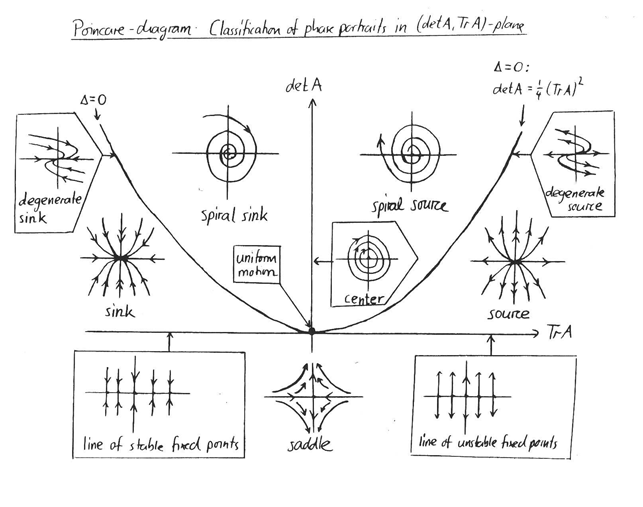

## 5. Análisis dinámico 

Veamos el comportamiento transitorio del proceso y comprobemos las conclusiones previas sobre su estabilidad 

In [27]:
# establecer modelo 
lotka_volterra <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        # ecuación de venados
        dVdt = alpha*V - beta*L*V
        # ecuación de lobos 
        dLdt = gamma*L*V - delta*L

        return(list(c(dVdt, dLdt)))
    })
}

In [28]:
# establecer valor de parámetros 
p <- c(alpha = alpha, beta = beta, gamma = gamma, delta = delta)
# condiciones iniciales
s <- c(V = 10, L = 2)
# tiempo de integración 
time <- seq(0,200,0.1)

In [29]:
# resolver EDOs 
out <- ode(func = lotka_volterra, y = s, parms = p,times = time, method = "rk4")

In [30]:
# guardar resultados 
out <- as.data.frame(out)
head(out) 

,time,V,L
,<dbl>,<dbl>,<dbl>
1,0.0,10.00000,2.000000
2,0.1,10.30032,2.083185
3,0.2,10.60048,2.173090
4,0.3,10.89919,2.270273
5,0.4,11.19500,2.375332
6,0.5,11.48628,2.488904


In [31]:
# cargar ggplot2
library(ggplot2)

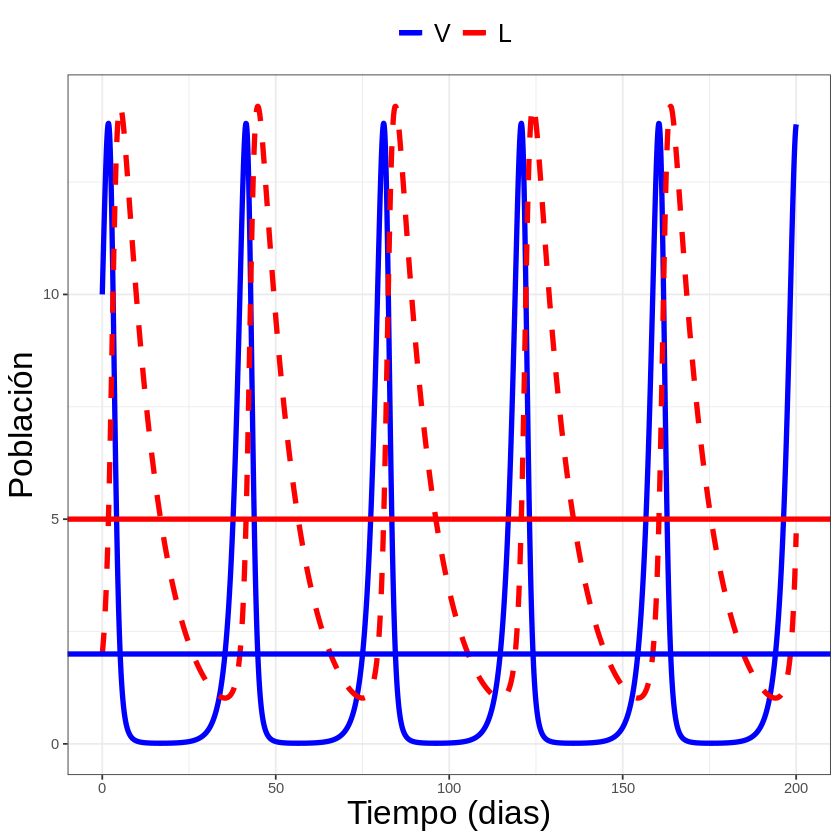

In [32]:
ggplot(data = out, aes(x = time)) +
geom_line(aes(y = V, col = "V"), lty = 1, lwd = 1.5) +
geom_line(aes(y = L, col = "L"), lty = 2, lwd = 1.5) +
geom_hline(yintercept = alpha/beta, col = "red",  lty = 1, lwd = 1.5) +
geom_hline(yintercept = delta/gamma, col = "blue", lty = 1, lwd = 1.5) +
scale_color_manual("", values = c("blue","red"), breaks = c("V", "L")) +
xlab("Tiempo (dias)") +
ylab("Población") +
theme_bw()+
theme(
    legend.position = "top",
    legend.text = element_text(size = 15),
    axis.title.y = element_text(size = 20),
    axis.title.x = element_text(size = 20)
    ) 


Se observa como la población de venados y de lobos oscilan alrededor del punto de equilibrio $(\delta/\gamma, \alpha/\beta)$ que en el ejemplo es $(2,5)$. Este tipo de oscilación alrededor del punto de equilibrio es característica de un ciclo límite???? 

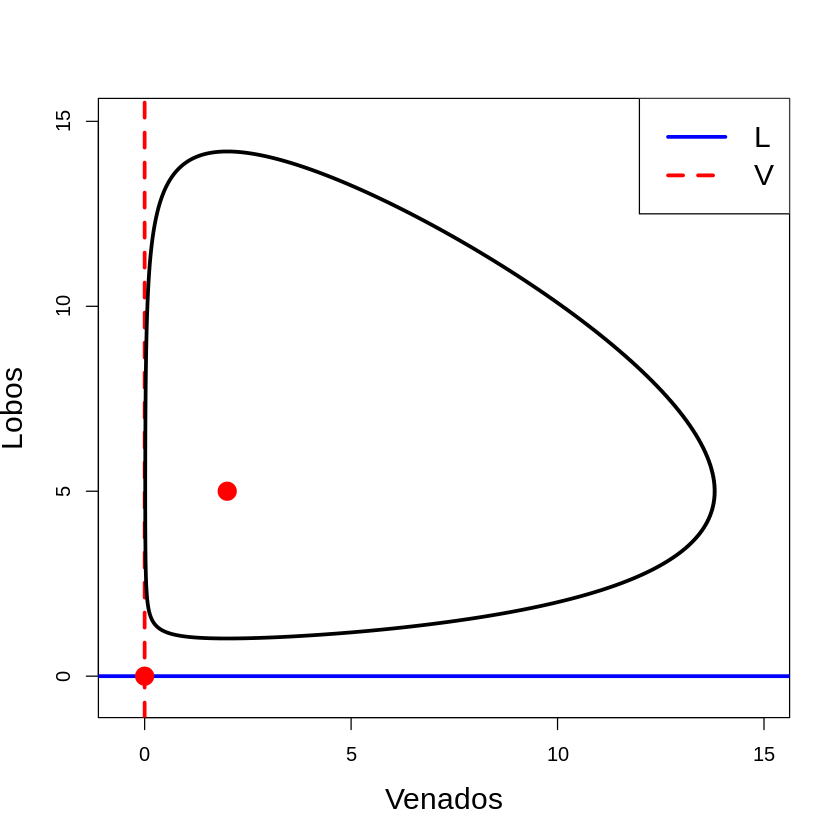

In [33]:
# dibujar plano
plot(0,0, type = "n", ylim = c(-0.5,15), xlim = c(-0.5,15), xlab = "Venados", ylab = "Lobos", cex.lab = 1.5)

# dibujar ceroclinas
abline(h = 0, v = 0, col = c("blue","red"), lwd = 3, lty = c(1,2))

# trayectoria 
lines(out$V, out$L, type = "l", lwd = 3)

# dibujar puntos de equilibrio
points(c(0, delta/gamma), c(0, alpha/beta), pch = 20, col = "red", cex = 3)
legend("topright", legend = c("L","V"), lwd = 3, lty = c(1,2), col = c("blue","red"), cex = 1.5)

# Ejemplo 4: Dímero 

## 1. Describir proceso 

Se tiene el siguiente conjunto de reacciones

$$
\
$$

Reacción de producción de $X$
$$
X_{pre} \xrightarrow[]{E_{prod}} \tag{18} X
$$

Reacción de degradación de $X$
$$
X \xrightarrow[]{E_{deg}}  \varnothing \tag{19}
$$

Reacción de dimerización 
$$
X + Y 	\xrightarrow[]{E_{dim}} XY \tag{20}
$$


Reacción de disociación
$$
XY 	\xrightarrow[]{E_{dis}} X + Y \tag{21}
$$


## 2. Red para describir el proceso

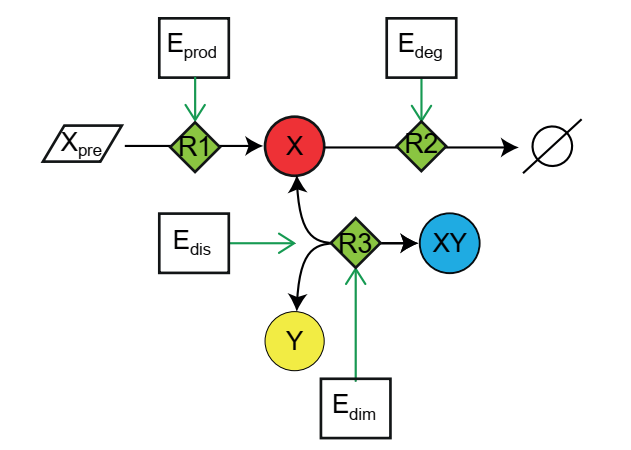

## 3. Establecer el modelo 

Balance para $X$

$$
\frac{dX(t)}{dt} = E_{prod}X_{pre} - E_{deg}X(t) - E_{dim}X(t)Y(t) + E_{dis}XY(t) \tag{22}
$$

Balance para $Y$

$$
\frac{dY(t)}{dt} = -E_{dim}X(t)Y(t) + E_{dis}XY(t) \tag{23}
$$

Balance para $XY$

$$
\frac{dXY(t)}{dt} = E_{dim}X(t)Y(t) - E_{dis}XY(t) \tag{24}
$$

## Ecuaciones de conservación 

Simplificación del sistema de ecuaciones (reducción del número de dimensiones de las variables dinámicas)

$$
\sum_{j=1}^k\frac{dx_j(t)}{dt} = 0 \tag{25}
$$

$$
\rightarrow \sum_{j=1}^kx_j(t) = x_k^{tot} = constante \tag{26}
$$


$$
\frac{dX(t)}{dt} = E_{prod}X_{pre} - E_{deg}X(t) - E_{dim}X(t)Y(t) + E_{dis}(Y_{tot} - Y(t)) \tag{27}
$$


$$
\frac{dY(t)}{dt} = -E_{dim}X(t)Y(t) + E_{dis}(Y_{tot} - Y(t)) \tag{28}
$$

Nota: Claramente no todos los sistemas de ecuaciones pueden reducirse por ecuaciones de conservación

## 4. Análisis de estabilidad

Igualamos (27) y (28) a $0$ para obtener 

$$
E_{prod}X_{pre} - E_{deg}X - E_{dim}X \cdot Y + E_{dis}(Y_{tot} - Y) = 0\tag{29}
$$
$$
\
$$
$$
 - E_{dim}X \cdot Y + E_{dis}(Y_{tot} - Y) = 0 \tag{30}
$$

Sustituyendo (30) en (29) se llega a 

$$
E_{prod}X_{pre} - E_{deg}X  = 0 \rightarrow X_{ss} = \frac{E_{prod}X_{pre}}{E_{deg}}\
$$

Resolviendo (30) para $Y$ se obtiene 

$$
-(E_{dim}X + E_{dis})Y + E_{dis}Y_{tot} = 0\
$$

$$
Y = \frac{E_{dis} Y_{tot}}{E_{dim}X + E_{dis}}
$$

Sustituyendo el valor de $X_{ss}$

$$
Y_{ss} = \frac{E_{dis}E_{deg}Y_{tot}}{E_{dis}E_{deg} + E_{dim}E_{prod}X_{pre}}
$$



In [61]:
# estado estable 
steady_state <- function(p) {
    with(as.list(p), {

        Xss = Eprod*Xpre/Edeg
        Yss = Edis*Edeg*Ytot/(Edis*Edeg + Edim*Eprod*Xpre)

        return(list(Xss = Xss, Yss = Yss))
    })
}

In [62]:
# establecer valor de parámetros 
p <- c(Eprod = 1, Xpre = 1, Edeg = 0.5, Edim = 0.8, Edis = 0.2, Ytot = 10)

In [63]:
ss <- steady_state(p)
print(ss)

$Xss
[1] 2

$Yss
[1] 1.111111



1. Graficar el plano de fase


In [37]:
# ceroclina de dY/dt = 0
nullcline_y <- function(p,X) {
    with(as.list(p), {

        Y = Edis*Ytot/(Edim*X + Edis)

        return(Y)
    })
    
}

# ceroclina de dX/dt = 0
nullcline_x <- function(p,Y) {
    with(as.list(p), {

        X = (Eprod*Xpre + Edis*(Ytot - Y))/(Edeg + Edim*Y)

        return(X)
    })
    
}

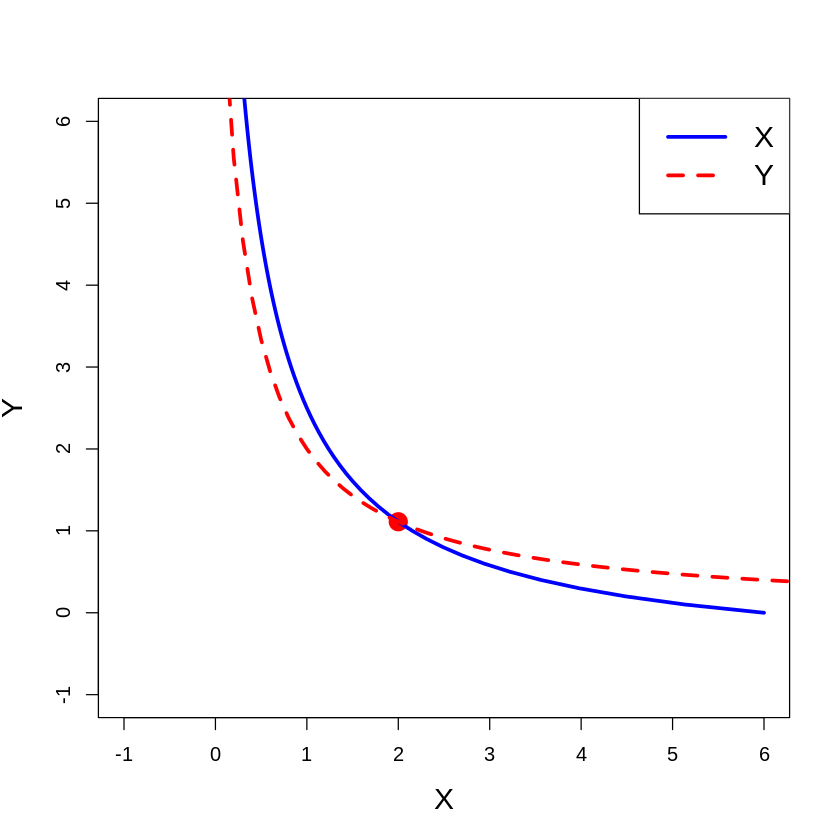

In [38]:
# dibujar plano de fase
plot(0,0, type = "n", ylim = c(-1,6), xlim = c(-1,6), xlab = "X", ylab = "Y", cex.lab = 1.5)

with(as.list(p), {
    # dibujar punto de equilibrio
    Xss = Eprod*Xpre/Edeg
    Yss = Edis*Ytot/(Edim*Xss + Edis)
    points(Xss, Yss, pch = 20, col = "red", cex = 3)
})

# ceroclina de dX/dt = 0
Y <- seq(0,10,0.1)
lines(nullcline_x(p, Y),Y, col = c("blue"), lwd = 3, lty = 1)

# ceroclina de dY/dt = 0
X <- seq(0,10,0.1)
lines(X,nullcline_y(p, X), col = c("red"), lwd = 3, lty = 2)

# dibujar puntos de equilibrio
legend("topright", legend = c("X","Y"), lwd = 3, lty = c(1,2), col = c("blue","red"), cex = 1.5)

Es difícil determinar la estabilidad del punto de equilibrio a través del plano de fase. Sin embargo, podemos obtener el signo de los eigenvalores a partir de las derivadas parciales de (27) y (28) 

2. Caluculo de eigenvalores

Recordando que las ecuaciones que describen el proceso son 

$$
f(X,Y) = E_{prod}X_{pre} - E_{deg}X - E_{dim}X\times Y + E_{dis}(Y_{tot} - Y)
$$

$$
\
$$

$$
g(X,Y) = - E_{dim} X \times Y + E_{dis} (Y_{tot} - Y)
$$




Tomando sus derivadas parciales y evaluando en el punto de equilibrio $(X_{ss}, Y_{ss})$ tenemos

$$
\
$$

$$
\frac{\partial f(X_{ss},Y_{ss})}{\partial X} = -(E_{deg} + E_{dim}Y_{ss}) = - \alpha
$$

$$
\
$$

$$
\frac{\partial f(X_{ss},Y_{ss})}{\partial Y} = - (E_{dim} X_{ss} + E_{dis}) = - \beta
$$

$$
\
$$

$$
\frac{\partial g(X_{ss},Y_{ss})}{\partial X} = - E_{dim} Y_{ss} = - \gamma
$$

$$
\
$$

$$
\frac{\partial g(X_{ss},Y_{ss})}{\partial Y} = - (E_{dim}X_{ss} + E_{dis}) = - \beta
$$

Por lo tanto la matriz Jacobiana es 

$$
J(X_{ss},Y_{ss}) = 
\begin{bmatrix}
-\alpha & -\beta \\
-\gamma & - \beta
\end{bmatrix}
$$

Y la traza y el determinante son 

$$
tr = - (\alpha + \beta) < 0
$$

$$
det = \alpha \beta - \gamma \beta = \beta (\alpha - \gamma) = \beta E_{deg} > 0
$$

Dado que la traza es negativa y el determinante positivo ambos eigenvalores deben ser negativos. Concluimos entonces que el punto de equilibrio $(X_{ss}, Y_{ss})$ es estable 

## 5. Análisis dinámico (integración numérica)

In [42]:
# establecer modelo 
dimero <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        # balance para X 
        dXdt = Eprod*Xpre - Edeg*X - Edim*X*Y + Edis*(Ytot - Y)
        # balance para Y
        dYdt = -Edim*X*Y + Edis*(Ytot - Y)

        return(list(c(dXdt, dYdt)))
    })
}

In [43]:
# establecer parámetros 
print(p)

Eprod  Xpre  Edeg  Edim  Edis  Ytot 
  1.0   1.0   0.5   0.8   0.2  10.0 


In [54]:
# condiciones iniciales 
s <- c(X = 1, Y = 1)
# tiempo de integración
time <- seq(0,20,0.1)

In [55]:
# resolver EDOs
out <- ode(func = dimero, y = s, times = time, parms = p, method = "rk4")

In [56]:
# guardar resltados 
out <- as.data.frame(out)
head(out)

,time,X,Y
,<dbl>,<dbl>,<dbl>
1,0.0,1.000000,1.000000
2,0.1,1.135880,1.089393
3,0.2,1.246203,1.159366
4,0.3,1.335060,1.212836
5,0.4,1.406339,1.252716
6,0.5,1.463502,1.281678


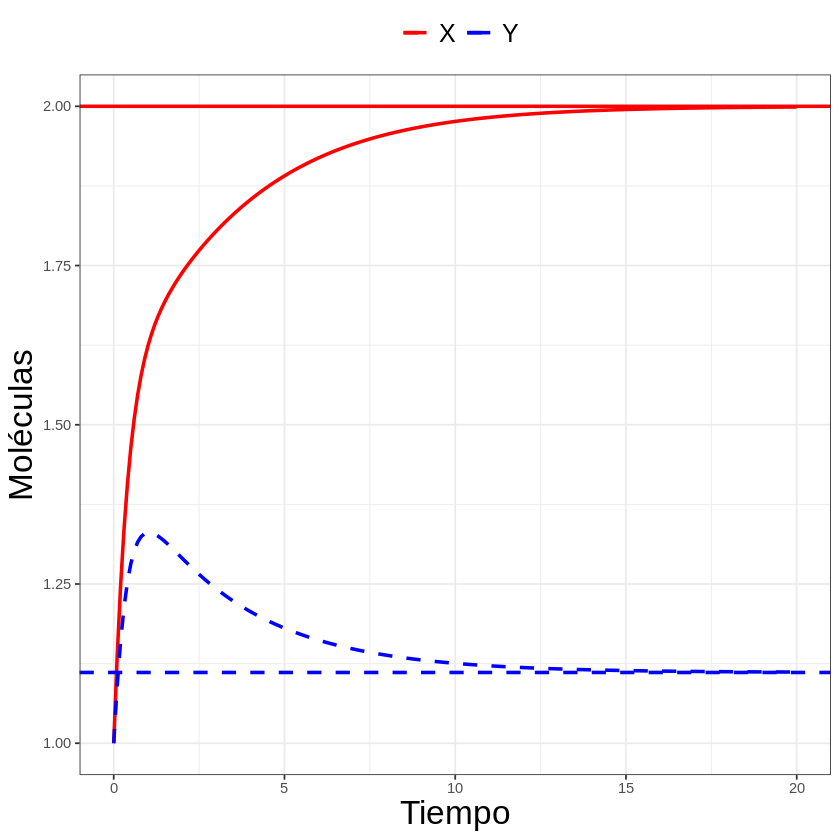

In [65]:
# mostrar resultados 
ggplot(out, aes(x = time)) +
geom_line(aes(y = X, color = "X"), lwd = 1) + 
geom_line(aes(y = Y, color = "Y"), lwd = 1, lty = 2) +
geom_hline(yintercept = ss$Xss, color = "red", lwd = 1) + 
geom_hline(yintercept = ss$Yss, color = "blue", lwd = 1, lty = 2) +
scale_color_manual("", values = c("red","blue"), breaks = c("X","Y"))+
ylab("Moléculas") +
xlab("Tiempo") +
theme_bw()+
theme(
    legend.position = "top",
    legend.text = element_text(size = 15),
    axis.title.y = element_text(size = 20),
    axis.title.x = element_text(size = 20)
)

Figura X. Gráfica de $X$ y $Y$ vs tiempo. Vemos que el número de moléculas tienden al punto de equilibrio. En el caso de $Y$ existe un incremento en el número de moléculas hasta alcanzar una máximo alrededor del tiempo $1$ y después disminuye. 